# Lecture 07 - 11 October 2021

## Sufficiently close approximation for the simulation theorem

In the previous lecture a way to approximate a system $\tilde{G}(s)$ or $\tilde{G}(\omega)$ with a discrete transfer function was seen. The result obtained is that $V(z)$ is a perfect simulator for $\tilde{G}(\omega)$ if and only if $\tilde{G}(\omega)=V(z=e^{-i\omega T})$.
It's now time to searcb for a general way to obtain the discrete $\tilde{V}(z)$ starting from the transfer function $\tilde{G}(\omega)$. A first way would be to invert $z=e^{-i\omega T}\rightarrow \omega=\frac{i}{T}ln(Z)$ but that would introduce a [branch cut](https://en.wikipedia.org/wiki/Branch_point#Branch_cuts) on $\mathcal{R}_{0}^{-}$. A possibility is to abandon the search for an _exact inversion_ anduse a _sufficiently close approximation_ $\tilde{V} = \tilde{G}(\omega=f(z)) + \mathcal{o}\left( w^n\right)$.


### Case 1: $sin(\omega t)$
Let's start by writing $sin(\omega t)$ as an exponential:

\begin{align*}
sin(\omega t) = \frac{e^{i\omega t}-e^{-i\omega t}}{2i} = \frac{\frac{1/z}-z}{2i} = \frac{1-z^2}{2iz} = \frac{1-z^2}{z}\frac{1}{2i}
\end{align*}

And write the taylot series:
\begin{align*}
sin(\omega t) = \omega t - \frac{(\omega T)^3}{6}+\mathcal{o}\left( (\omega T)^3 \right)
\end{align*}

So that 
\begin{align*}
&\omega t - \frac{(\omega T)^3}{6}+\mathcal{o}\left( (\omega T)^3 \right) = \frac{1-z^2}{z}\frac{1}{2i}\\
\implies & \omega = \frac{z^2-1}{z}\frac{i}{2T}+\mathcal{o}\left( (\omega T)^3 \right)\\
    \implies & \tilde{G}_{low pass}(\omega)=\frac{1}{1-i\omega \tau}=\frac{1}{1-i\tau \frac{1-z^2}{z}\frac{1}{2i}} = \frac{2Tz}{2Tz-\tau+\tau z^2} = \tilde{G}(z)=\tilde{V}(z)
\end{align*}

### Case 2: Bilinear Transform $tg\left( \frac{\omega T}{2}\right)$
\begin{align*}
    tg\left( \frac{\omega T}{2}\right) &= \frac{e^{i\omega T/2}- e^{-i\omega T/2}}{i\left( e^{i\omega T/2} + e^{i\omega T/2}\right)} = \frac{1}{i} \frac{1-e^{-i\omega T}}{1+e^{i\omega T}} = \frac{1}{i} \frac{z-1}{z+1} = \frac{\omega T}{2}+\mathcal{o}\left( (\omega T)^3 \right) \\
    &\implies \omega \simeq \frac{2i}{T}  \frac{z-1}{z+1} +\mathcal{o}\left( (\omega T)^3 \right)
\end{align*}

**Note:** any function can be choosen to obtain the approximation but $tg\left(\frac{\omega \pi}{2} \right)$ presents some nice features which will be discussed later.

**Note 2:** $V(z)=\tilde{G}_{\mathcal{F}}\left(\omega=\frac{2i}{T}  \frac{z-1}{z+1}\right) = \tilde{G}_{\mathcal{L}}\left(s=\frac{2}{T}  \frac{z-1}{z+1}\right)$ is expected to be a good approximation of $\tilde{G}_{\mathcal{F}}(\omega)=\tilde{G}_{\mathcal{L}}(s)$ if $\omega T << 1$ i.e. if $T_{SAMP}<< \frac{1}{\text{frequencies of interest}}$.

Let's now see what happends when we apply a bilinear transform to a rational function:
\begin{align*}
\tilde{G}(\omega)= \frac{N(\omega)}{D(\omega)} = \frac{\sum_{k=0}^Ma_k \omega^k}{\sum_{n=0}^N b_n \omega^n} \qquad \text{LTI}
\end{align*}

#### Reality is conserved
\begin{align*}
V(z)= \frac{\sum_{k=0}^Ma_k \left[ \frac{2i}{T}  \frac{z-1}{z+1} \right]^k}{\sum_{n=0}^N b_n \left[\frac{2i}{T}  \frac{z-1}{z+1} \right]^n} = \tilde{G}(\omega) \qquad V^*(z^*) = \frac{\sum_{k=0}^Ma_k \left[ \frac{2(-i)}{T}  \frac{z-1}{z+1} \right]^k}{\sum_{n=0}^N b_n \left[\frac{2(-i)}{T}  \frac{z-1}{z+1} \right]^n} = \tilde{G}(-\omega)
\end{align*}
As we know that _an analog system is real $\iff\ \tilde{G}^*(\omega)=\tilde{G}(-\omega)$_ we have proven the statement.

#### Causality
Causality can be proven but the proof is long nd tedious. Just assume causality a priori with the condition $0\not \in ROC; \infty \subset ROC$.

#### Bibo Stability
**Reminder**: An analog system is bibo stable $\iff \mathcal{Re}\{poles\}<0$.
**Reminder 2**: A rational system can always be decomposed in a sum of fractions:
\begin{align*}
\tilde{G}(s)=\frac{N(s)}{D(s)}= ... + \frac{A}{(s-s_0)^n} \xrightarrow[Transform]{Bilinear} ... + \frac{A}{\left(\frac{2(-i)}{T}  \frac{z-1}{z+1}-\frac{2(-i)}{T}  \frac{z_0-1}{z_0+1}\right)^n} = ... + A\left[\frac{T}{2}\frac{(z+1)(z-1)}{z-z_0}\right]^N
\end{align*}
and the poles stays of the same order after a bilinear transformation.
It's now possible to prove the preservation of bibo stability:
\begin{align*}
s &= \frac{2}{T} \frac{z-1}{z+1} \rightarrow z=\frac{1+sT/2}{1-sT/2} = \frac{1+x+iy}{1-x-iy}\\
&\text{with }\frac{T}{2}s=x+iy,\quad x,y\in\mathcal{R}\\
&\implies \left| z_0 \right| = 1+\frac{4x_0}{(x_0-1)^2+y_0^2} = 1+\frac{2T\mathcal{Re}\left\{s_0\right\}}{\left(1-\frac{T}{2}\mathcal{Re}\left\{s_0\right\} \right)^2 + \left(\mathcal{Im}\left\{s_0\right\} \right)^2}
\end{align*}
by imposing $\mathcal{Re}\{poles\}<0$ one obtains $\left| z_0 \right|<0$, that is, all the poles $\subset \Gamma_1$.
As all the poles are strictly under $\Gamma_1$ it is possible to find a curve that includes all the polesm is contained in $\Gamma_1$ and encloses $+\infty$. This implies that the system is bibo stable.
An other reason for which bilinear is preferred is that it is well-behaved near the boundaries of the Nyquist band:

Assume $N>M$ (this can always be done by renaming eventual derivatives in the transfer function)
\begin{align*}
\tilde{G}(\omega)= \frac{N(\omega)}{D(\omega)} = \frac{\sum_{k=0}^Ma_k \omega^k}{\sum_{n=0}^N b_n \omega^n} \rightarrow \tilde{V}(z) = \frac{\sum_{k=0}^Ma_k \left[ \frac{2i}{T}  \frac{z-1}{z+1} \right]^k (z+1)^M}{\sum_{n=0}^N b_n \left[\frac{2i}{T}  \frac{z-1}{z+1} \right]^n (z+1)^N} \frac{(z+1)^N}{(z+1)^M} = \frac{N'(z)}{D'(z)}(z+1)^{N-M}
\end{align*}
The term $(z+1)^{N-M}$ is a leading term. Now let's replace the simulation theorem:
\begin{align*}
    \tilde{G}(\omega)=V\left(z=e^{-i\omega T}\right) = \left. \frac{N'\left( z=e^{-i\omega T}\right)}{D'\left(z=e^{-i\omega T}\right)} \left( e^{-i\omega T}+1\right)^{N-M} \right|_{\omega = \pm \frac{\pi}{T} }=0
\end{align*}

That is the tails of $\tilde{x}(\omega)$ are smoothed out near the boundaries of the Nyquist band and ensure a nice transition to the cut region.

#### e.g. LOW PASS (actual implementation)
\begin{align*}
    \tilde{G}(\omega) &= \frac{1}{1-i\omega \tau} \\
    V(z)&=\frac{1}{1-\frac{2\tau}{T}\frac{z-1}{z+1}} = \frac{z+1}{z\left(1+\frac{2\tau}{T}\right)-\left( \frac{2\tau}{T}-1\right)} \\
    & =\frac{1-c}{2}\frac{z+1}{z-c} \qquad \text{with } c=\frac{1-T/2\tau}{1+T/2\tau} \\
    V(z)&=\frac{Y(z)}{X(z)}= \frac{1-c}{2}\frac{z+1}{z-c} \implies y(z)\left( 1-\frac{c}{z}\right)=\frac{1-c}{2}\left( 1+\frac{1}{z}\right) x(z)\\
    &\implies y[n]=c-y[n-1]=\frac{1-c}{2}(x[n]+x[n-1]) \quad \text{Time domain}
\end{align*}

Let's now plot the Bode diagram for a low pass an for its bilinear transform. The two equation of interests are:
\begin{align*}
\text{Ideal low pass} &\quad \tilde{G}(\omega)=\frac{1}{1-i\omega \tau}\\
\text{Discrete low pass} &\quad V\left(\omega\right)=\frac{1-c}{2}\frac{e^{-i\omega T}+1}{ce^{-i\omega T}-1}\\
f_{3dB}&=10 \text{ Hz} \quad T = 2^{-10} \simeq 10^{-3}
\end{align*}

T=	9.765625e-04
tau=	1.591549e-02


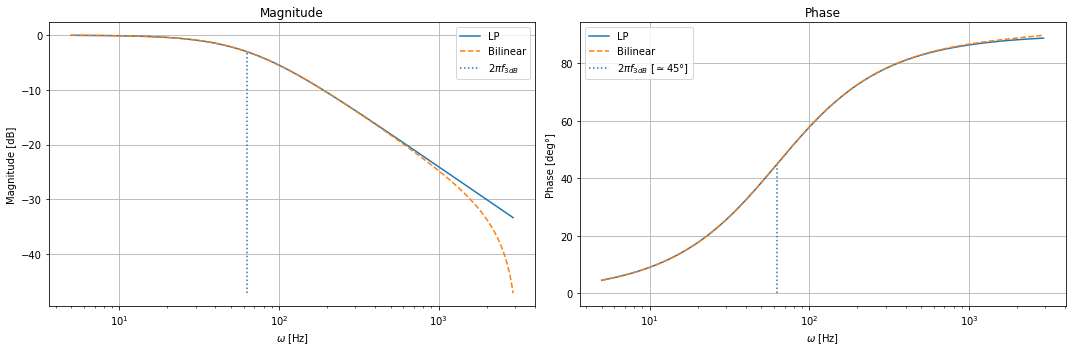

In [46]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

T=1/1024 # Sampling time
omega = np.arange(start=5, stop=0.91*np.pi/T, step=T)
f3dB = 10 # Hz

omega0=2*np.pi*f3dB
tau = 1/(2*np.pi*f3dB)
##print("T=\t{:e}\ntau=\t{:e}".format(T, tau))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


lp = 1/(1-1j*omega*tau) # Ideal Low pass 
mag_lp = 20*np.log10(np.abs(lp))
phase_lp = np.arctan(np.imag(lp)/np.real(lp))*180/np.pi


c = (1-T/(2*tau) ) / (1+T/(2*tau) )
lp_bt = 0.5*(1-c)*(np.exp(-1j*omega*T)+1 )/( c*np.exp(-1j*omega*T)-1)
mag_lp_bt = 20*np.log10(np.abs(lp_bt))
phase_lp_bt = -1*np.arctan( np.imag(lp_bt)/np.real(lp_bt))*180/np.pi


ax[0].semilogx(omega, mag_lp, label="LP")    # Bode magnitude plot
ax[0].semilogx(omega, mag_lp_bt, "--", label="Bilinear")    # Bode magnitude plot

ax[1].semilogx(omega, phase_lp, label="LP")
ax[1].semilogx(omega, phase_lp_bt, "--", label="Bilinear")

ax[0].vlines(omega0, min(mag_lp_bt), 20*np.log10(np.abs(1/(1-1j))),linestyles=":", label=r"$2\pi f_{3dB}$")
ax[1].vlines(omega0, 0, 45, linestyles=":", label=r"$2\pi f_{3dB}$ [$\simeq$45°]")


ax[0].set_title("Magnitude");  ax[1].set_title("Phase")
ax[0].set_xlabel(r"$\omega$ [Hz]"); ax[0].set_ylabel(r"Magnitude [dB]");
ax[1].set_xlabel(r"$\omega$ [Hz]"); ax[1].set_ylabel(r"Phase [deg°]");
ax[0].grid();   ax[1].grid()
ax[0].legend(); ax[1].legend()

fig.tight_layout()
plt.show()